In [1]:
'''
Written by
Mincheol Kim

Biomedical Informatics Lab.,
Department of Digital Health,
Samsung Advanced Institute for Health Sciences & Technology,
SungKyunKwan University, Korea

Email : mc.kim@skku.edu
        mincheol.kim.1996@gmail.com
Mobile : +82-10-4930-7545
'''

'\nWritten by\nMincheol Kim\n\nBiomedical Informatics Lab.,\nDepartment of Digital Health,\nSamsung Advanced Institute for Health Sciences & Technology,\nSungKyunKwan University, Korea\n\nEmail : mc.kim@skku.edu\n        mincheol.kim.1996@gmail.com\nMobile : +82-10-4930-7545\n'

# 0. Import Packages

In [2]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
random_seed = 42

random.seed(random_seed)
np.random.seed(random_seed)

# 1. Benchmark Dataset

## 1-1. Load Dataset

In [4]:
df_raw = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", header=None)

## 1-2. Preprocess Dataset

In [5]:
df = df_raw.copy()

Check dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Drop '?' value

In [8]:
df = df.replace('?', np.nan)
df = df.dropna(axis=0, how='any')

In [9]:
df[1] = df[1].astype(float)

Drop Attribute 13 (Zip code)

In [10]:
df = df.drop([13], axis=1)

Exploratory Data Anaylsis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    object 
 1   1       653 non-null    float64
 2   2       653 non-null    float64
 3   3       653 non-null    object 
 4   4       653 non-null    object 
 5   5       653 non-null    object 
 6   6       653 non-null    object 
 7   7       653 non-null    float64
 8   8       653 non-null    object 
 9   9       653 non-null    object 
 10  10      653 non-null    int64  
 11  11      653 non-null    object 
 12  12      653 non-null    object 
 13  14      653 non-null    int64  
 14  15      653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.6+ KB


In [12]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

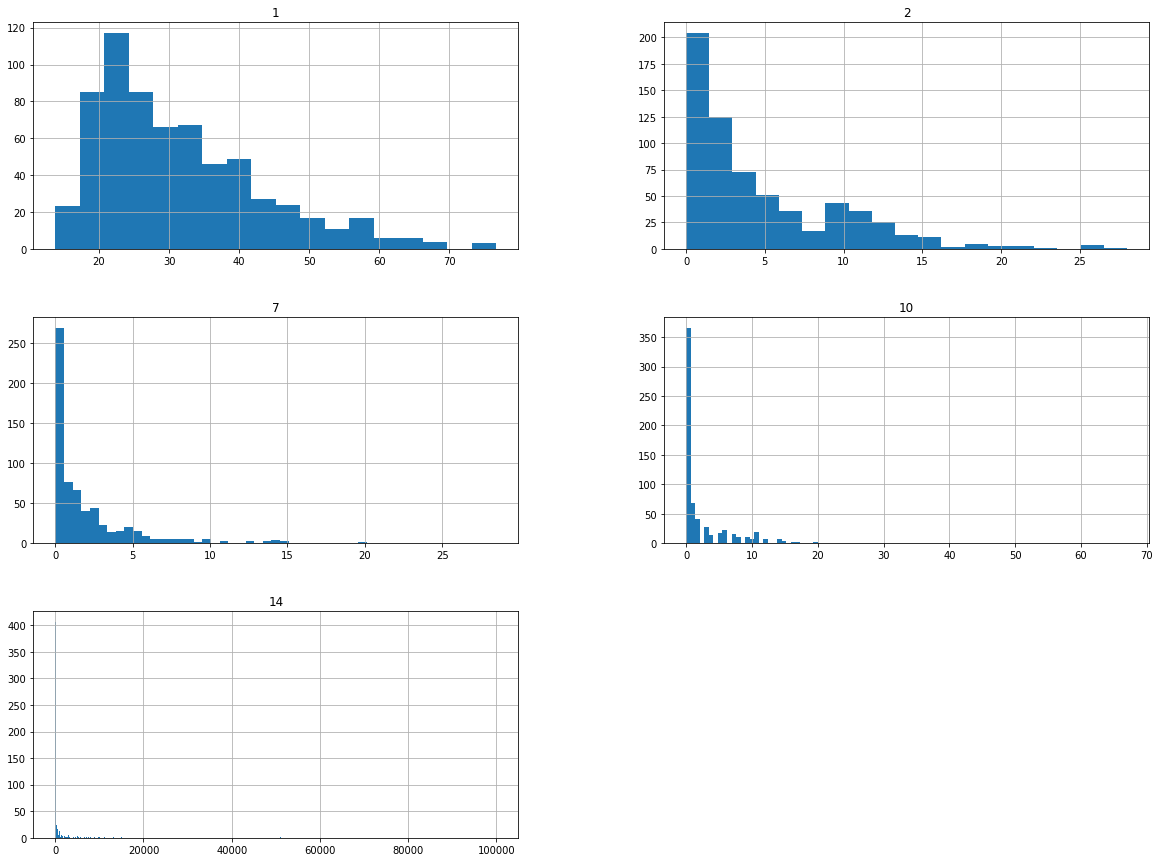

In [13]:
df_num.hist(bins='auto', figsize=(20, 15))
plt.show()

In [14]:
for col in df_cat.columns:
  print("Attribute", str(col))
  print(df[col].value_counts().sort_index(), end='\n\n')

Attribute 0
a    203
b    450
Name: 0, dtype: int64

Attribute 3
l      2
u    499
y    152
Name: 3, dtype: int64

Attribute 4
g     499
gg      2
p     152
Name: 4, dtype: int64

Attribute 5
aa     52
c     133
cc     40
d      26
e      24
ff     50
i      55
j      10
k      48
m      38
q      75
r       3
w      63
x      36
Name: 5, dtype: int64

Attribute 6
bb     53
dd      6
ff     54
h     137
j       8
n       4
o       2
v     381
z       8
Name: 6, dtype: int64

Attribute 8
f    304
t    349
Name: 8, dtype: int64

Attribute 9
f    366
t    287
Name: 9, dtype: int64

Attribute 11
f    351
t    302
Name: 11, dtype: int64

Attribute 12
g    598
p      2
s     53
Name: 12, dtype: int64

Attribute 15
+    296
-    357
Name: 15, dtype: int64



In [15]:
df[14] = df[14].map(lambda x: np.log(x + 1))

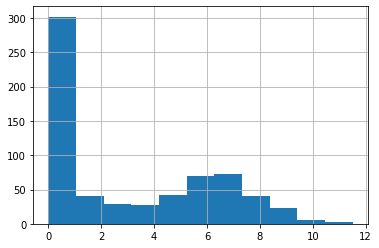

In [16]:
df[14].hist(bins='auto')
plt.show()

In [17]:
df[15] = (df[15] == '+').astype(int)

In [18]:
df[df_num.columns] = MinMaxScaler().fit_transform(df[df_num.columns])

In [19]:
cat_dummy = list(df_cat.columns)
cat_dummy.remove(15)

In [20]:
df = pd.get_dummies(df, columns=cat_dummy, prefix=cat_dummy)

In [21]:
X = df.drop(15, axis=1).copy()
Y = df[15].copy()

X = np.array(X.values)
Y = np.array(Y.values)

# 2. Machine Learning Models

## 2-1. Canonical Models

Decision Tree (DT)

In [22]:
dt_clf = DecisionTreeClassifier(criterion='entropy', 
                                splitter='best', 
                                random_state=42)

In [23]:
dt_results = cross_validate(dt_clf, X, Y, scoring=["accuracy", "precision", "recall", "f1"], cv=10)

In [24]:
dt_accuracy = dt_results["test_accuracy"]
dt_accuracy

array([0.53030303, 0.78787879, 0.90909091, 0.90769231, 0.89230769,
       0.87692308, 0.83076923, 0.63076923, 0.92307692, 0.86153846])

In [25]:
dt_precision = dt_results["test_precision"]
dt_precision

array([0.4893617 , 0.78571429, 1.        , 0.92857143, 0.92592593,
       0.89285714, 0.875     , 0.56097561, 0.92857143, 1.        ])

In [26]:
dt_recall = dt_results["test_recall"]
dt_recall

array([0.76666667, 0.73333333, 0.8       , 0.86666667, 0.83333333,
       0.83333333, 0.72413793, 0.79310345, 0.89655172, 0.68965517])

In [27]:
dt_f1 = dt_results["test_f1"]
dt_f1

array([0.5974026 , 0.75862069, 0.88888889, 0.89655172, 0.87719298,
       0.86206897, 0.79245283, 0.65714286, 0.9122807 , 0.81632653])

In [28]:
print("Decision Tree", end='\n\n')
print("Accuracy  :", round(dt_accuracy.mean(), 3))
print("Precision :", round(dt_precision.mean(), 3))
print("Recall    :", round(dt_recall.mean(), 3))
print("F1        :", round(dt_f1.mean(), 3))

Decision Tree

Accuracy  : 0.815
Precision : 0.839
Recall    : 0.794
F1        : 0.806


In [29]:
dt_predict = cross_val_predict(dt_clf, X, Y, cv=10)
confusion_matrix(Y, dt_predict)

array([[297,  60],
       [ 61, 235]])

Multi Layer Perceptrons (MLP)

In [30]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 128, 128, 128, 32), 
                        activation='relu', 
                        solver='adam', 
                        alpha=0, 
                        batch_size=64, 
                        learning_rate='constant', 
                        learning_rate_init=0.01, 
                        max_iter=1000, 
                        shuffle=True, 
                        random_state=42, 
                        early_stopping=True, 
                        validation_fraction=0.2)

In [31]:
# param_grid = [
#         {"hidden_layer_sizes": [ 
#                                 (128, 128, 128, 128), 
#                                 (128, 128, 128, 128, 32), 
#                                 (128, 128, 128, 128, 64), 
#                                 (128, 128, 128, 128, 32, 16)
#                                 ], 
#          "learning_rate_init": [0.01, 0.001]}
# ]

In [32]:
# grid_search = GridSearchCV(mlp_clf, param_grid, cv=10, scoring="accuracy", return_train_score=True)

In [33]:
# grid_search.fit(X, Y)

In [34]:
# grid_search.best_params_

In [35]:
# mlp_cv_results = grid_search.cv_results_

In [36]:
# for mean_score, params in zip(mlp_cv_results["mean_test_score"], mlp_cv_results["params"]):
#   print(mean_score, params)

In [37]:
mlp_results = cross_validate(mlp_clf, X, Y, scoring=["accuracy", "precision", "recall", "f1"], cv=10)

In [38]:
mlp_accuracy = mlp_results["test_accuracy"]
mlp_accuracy

array([0.56060606, 0.86363636, 1.        , 0.98461538, 0.92307692,
       0.90769231, 0.89230769, 0.63076923, 1.        , 0.87692308])

In [39]:
mlp_precision = mlp_results["test_precision"]
mlp_precision

array([0.51020408, 0.81818182, 1.        , 0.96774194, 1.        ,
       0.92857143, 1.        , 0.55813953, 1.        , 0.95652174])

In [40]:
mlp_recall = mlp_results["test_recall"]
mlp_recall

array([0.83333333, 0.9       , 1.        , 1.        , 0.83333333,
       0.86666667, 0.75862069, 0.82758621, 1.        , 0.75862069])

In [41]:
mlp_f1 = mlp_results["test_f1"]
mlp_f1

array([0.63291139, 0.85714286, 1.        , 0.98360656, 0.90909091,
       0.89655172, 0.8627451 , 0.66666667, 1.        , 0.84615385])

In [42]:
print("Multi Layer Perceptrons", end='\n\n')
print("Accuracy  :", round(mlp_accuracy.mean(), 3))
print("Precision :", round(mlp_precision.mean(), 3))
print("Recall    :", round(mlp_recall.mean(), 3))
print("F1        :", round(mlp_f1.mean(), 3))

Multi Layer Perceptrons

Accuracy  : 0.864
Precision : 0.874
Recall    : 0.878
F1        : 0.865


In [43]:
mlp_predict = cross_val_predict(mlp_clf, X, Y, cv=10)
confusion_matrix(Y, mlp_predict)

array([[304,  53],
       [ 36, 260]])

## 2-2. Committee Machines

Random Forests (RF)

In [44]:
rf_clf = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                random_state=42)

In [45]:
rf_results = cross_validate(rf_clf, X, Y, scoring=["accuracy", "precision", "recall", "f1"], cv=10)

In [46]:
rf_accuracy = rf_results["test_accuracy"]
rf_accuracy

array([0.48484848, 0.83333333, 0.98484848, 0.96923077, 0.93846154,
       0.92307692, 0.89230769, 0.61538462, 1.        , 0.86153846])

In [47]:
rf_precision = rf_results["test_precision"]
rf_precision

array([0.46551724, 0.80645161, 1.        , 0.96666667, 1.        ,
       1.        , 1.        , 0.54347826, 1.        , 0.95454545])

In [48]:
rf_recall = rf_results["test_recall"]
rf_recall

array([0.9       , 0.83333333, 0.96666667, 0.96666667, 0.86666667,
       0.83333333, 0.75862069, 0.86206897, 1.        , 0.72413793])

In [49]:
rf_f1 = rf_results["test_f1"]
rf_f1

array([0.61363636, 0.81967213, 0.98305085, 0.96666667, 0.92857143,
       0.90909091, 0.8627451 , 0.66666667, 1.        , 0.82352941])

In [50]:
print("Random Forests", end='\n\n')
print("Accuracy  :", round(rf_accuracy.mean(), 3))
print("Precision :", round(rf_precision.mean(), 3))
print("Recall    :", round(rf_recall.mean(), 3))
print("F1        :", round(rf_f1.mean(), 3))

Random Forests

Accuracy  : 0.85
Precision : 0.874
Recall    : 0.871
F1        : 0.857


In [51]:
rf_predict = cross_val_predict(rf_clf, X, Y, cv=10)
confusion_matrix(Y, rf_predict)

array([[297,  60],
       [ 38, 258]])

## 2-3. Deep Learning Methods

Restricted Boltzmann Machine (RBM)

In [52]:
logistic = LogisticRegression(solver='newton-cg', C=6000, tol=1)
rbm = BernoulliRBM(learning_rate=0.01, n_iter=10, n_components=100, random_state=42)
rbm_clf = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [53]:
rbm_results = cross_validate(rbm_clf, X, Y, scoring=["accuracy", "precision", "recall", "f1"], cv=10)

In [54]:
rbm_accuracy = rbm_results["test_accuracy"]
rbm_accuracy

array([0.63636364, 0.77272727, 0.98484848, 0.95384615, 0.93846154,
       0.92307692, 0.81538462, 0.66153846, 0.98461538, 0.83076923])

In [55]:
rbm_precision = rbm_results["test_precision"]
rbm_precision

array([0.56818182, 0.77777778, 0.96774194, 0.93548387, 1.        ,
       1.        , 0.9047619 , 0.58536585, 0.96666667, 0.95      ])

In [56]:
rbm_recall = rbm_results["test_recall"]
rbm_recall

array([0.83333333, 0.7       , 1.        , 0.96666667, 0.86666667,
       0.83333333, 0.65517241, 0.82758621, 1.        , 0.65517241])

In [57]:
rbm_f1 = rbm_results["test_precision"]
rbm_f1

array([0.56818182, 0.77777778, 0.96774194, 0.93548387, 1.        ,
       1.        , 0.9047619 , 0.58536585, 0.96666667, 0.95      ])

In [58]:
print("Restricted Boltzmann Machine", end='\n\n')
print("Accuracy  :", round(rbm_accuracy.mean(), 3))
print("Precision :", round(rbm_precision.mean(), 3))
print("Recall    :", round(rbm_recall.mean(), 3))
print("F1        :", round(rbm_f1.mean(), 3))

Restricted Boltzmann Machine

Accuracy  : 0.85
Precision : 0.866
Recall    : 0.834
F1        : 0.866


In [59]:
rbm_predict = cross_val_predict(rbm_clf, X, Y, cv=10)
confusion_matrix(Y, rbm_predict)

array([[308,  49],
       [ 49, 247]])